In [3]:
using PyPlot,JLD2,LsqFit

Using $\sqrt{e} \cos{\omega}$ and $\sqrt{e} \sin{\omega}$ as priors, doesnt work properly. don't know why. Reverted to previous prior $e \cos{\omega}$ and $e \sin{\omega}$

Using original prior on eccentricity.

In [124]:
calc_rad(value) = value * pi/180
calc_deg(value) = value * 180/pi
calc_omega(pomega,Omega) = pomega - Omega

calc_omega (generic function with 1 method)

In [122]:
g=jldopen("FITS/fromEMB/p3_fit30.0s30.0yrs.jld2","r")
tt,tt0,sigtt,ttmodel = g["tt"],g["tt0"],g["sigtt"],g["ttmodel"]
pbest_global = g["best_p3"]
nplanet,ntrans = g["nplanet"],g["ntrans"]
pair_ttvs = decompose_ttvs(nplanet,ntrans,pbest_global) .* (24 * 60)
n1,n2,n3 = ntrans
mu1,P1,t01,ecosw1,esinw1 = pbest_global[1:5]
mu2,P2,t02,ecosw2,esinw2 = pbest_global[6:10]
mu3,P3,t03,ecosw3,esinw3 = pbest_global[11:15]
time1 = collect(t01 .+ range(0,stop=n1-1,length=n1) .* P1)
time2 = collect(t02 .+ range(0,stop=n2-1,length=n2) .* P2)
tt1 = tt[1:n1]
tt2 = tt[n1+1:n1+n2];

Calculate mean longitudes using Equation 5 from Agol & Deck 2015

In [123]:
function calc_L(t,t0,P,esinw)
    lambda = (360/P .* (t.-t0)) .+ 2*esinw
    return lambda
end

calc_L (generic function with 1 method)

$L \equiv \lambda$. Check to see if $\lambda_{E} \sim \lambda_{V}$ at their respective transit times. $\lambda mod 2 \pi = \lambda_{obs}$[what?] where $\lambda_{obs}$ is longitude that both Earth and Venus have.
true $\lambda$ from planet body data sheet: 181.9, 100, 34 degrees ##181.97973, 100.46435, 34.40438

In [125]:
J2000 = 2451545.0

w1 = calc_deg(atan(esinw1,ecosw1))
w2 = calc_deg(atan(esinw2,ecosw2))
w3 = calc_deg(atan(esinw3,ecosw3))
w1,w2,w3

(110.24093749596905, 34.5333600284138, -69.08910379986942)

Calculate angular diffence between J2000 and time of periastron passage

In [206]:
M1,M2,M3=(J2000-t01)/P1 , (J2000-t02)/P2 , (J2000-t03)/P3

(80.29004012099195, 49.063055930544984, 2.973418764877712)

In [167]:
L_1 = calc_L(tt1,t01,P1,esinw1)
L_2 = calc_L(tt2,t02,P2,esinw2)
L_3 = calc_L(tt1,t03,P3,esinw3)
L_1,L_2,L_3

([0.012371787476397042, 360.0133343565473, 720.0169824870229, 1080.0135526690897, 1440.0122255198048, 1800.0170057665478, 2160.0177544631683, 2520.01589496752, 2880.0098961630033, 3240.010708947574  …  14040.012713830656, 14400.014083406671, 14760.016677415953, 15120.013983489262, 15480.011012335533, 15840.016055447844, 16200.017730867143, 16560.01607892639, 16920.011100616346, 17280.00925384235], [0.0193074189826956, 360.01755401405876, 720.0184902573101, 1080.015305463873, 1440.017709387891, 1800.0183440440064, 2160.0145286887832, 2520.0146528520695, 2880.014883589056, 3240.0152534528497  …  7560.018441732332, 7920.0166871745005, 8280.01969911849, 8640.01972129125, 9000.016764160737, 9360.017518242807, 9720.014787497934, 10080.016042194638, 10440.018009102552, 10800.01309921289], [-472.01679167601947, -452.80685458852207, -433.5967741973367, -414.387071491096, -395.1772565847874, -375.9671157829794, -356.7571901078858, -337.5474036080016, -318.337837984924, -299.12790889004646  …  27

I can't recall where the following numbers come from or how to find the reference angle that ends up being 77 degs

In [152]:
28904.409642330258-28722.430890811236

181.9787515190219

In [153]:
17662.6994287092-17562.229939921457

100.46948878774128

In [154]:
679.195296805864-644.8690628197218

34.326233986142256

Venus transit occurs 0.277 radians after it goes through periastron. Earth transit occurs -0.552 radians after it goes through periastron

In [135]:
L_1[end].+w1

17390.250191338317

In [115]:
L_1+w1,L_2+w2,L_3+w3

(-2.9193164641747487, 9.181361870724214, -728.3880501771732)

In [197]:
Dw1 = (((360/P1) .* (t01.- J2000)) .+ 181.97909950) + 360*80

77.56465594290057

In [192]:
Dw2 = ((360/P2) .* (t02 .- J2000) .+ 100.46457166) + 360*49.06304030994849

100.46457165999891

In [191]:
Dw3 = [(360/P3) .* (t03 .- J2000) .+ 34.39644051,(360/P3) .* (t03 .- J2000) .+ 34.39644051 + 360*1,(360/P3) .* (t03 .- J2000) .+ 34.39644051 + 360*2]

3-element Array{Float64,1}:
 -644.8690628197218 
 -284.86906281972176
   75.13093718027824

In [199]:
calc_evec1(e,omega) = e* cos(omega-77)
calc_evec2(e,omega) = e* sin(omega-77)
    trueec4=calc_evec1(0.04839266,14.75385)
    truees4=calc_evec2(0.04839266,14.75385)
println(trueec4," ",truees4)

0.040326747776546754 0.026750756169543723


Calculate lunar phase offset, $\Delta\phi= (P_p/P_s - round(P_p/P_s))*2\pi$ 

In [213]:
calc_dphi(P_p,P_s) = (P_p/P_s - round(P_p/P_s))*2pi

calc_dphi (generic function with 1 method)

In [217]:
dphi=calc_dphi(365.256355,27.322)
println(dphi," rad or ",calc_deg(dphi)," degrees")

2.315859255328402 rad or 132.68896127662714 degrees


In [214]:
err_dphi=calc_dphi()

365.25635535

$\delta t_{sar99}$ quoted in Kipping 2009

In [119]:
deltat_sar99(a_p,a_s,m_p,m_s,P_p) = (2*a_s*m_s*P_p) / (2*pi*a_p*m_p)
deltat_sar99(1.49e8,3.84e5,5.97e24,734.8e20,365.256355)

0.003687972556145138

This differs from Kipping 2009 by a factor of $2\sqrt{2}$

In [177]:
deltat_kip09=0.003687972556145138/(2*sqrt(2))

0.0013038952016400562

To calculate moon amplitude, use $t_{max} = \frac{M_s a_s P_p}{(M_s + M_p) 2\pi a_p}$ based on velocity of EMB about Sun

In [227]:
include("CGS.jl")
tmax(a_p,a_s,m_p,m_s,P_p) = (a_s*m_s*P_p) / (2*pi*a_p*(m_s+m_p))
tmax(CGS.AU,CGS.AMOON*CGS.AU,CGS.MEARTH,CGS.MMOON,365.256355)

0.0018137646001546222

propagate errors to find error on tmax

In [236]:
tmax_err(a_p,a_s,m_p,m_s,P_p,da_p,da_s,dm_p,dm_s,dP_p) = sqrt( (dm_s/m_s)^2 + (da_s/a_s)^2 + (dP_p/P_p)^2 + (da_p/a_p)^2 + (sqrt(dm_p^2 + dm_s^2)/(m_p+m_s))^2 )
tmax_err(CGS.AU,CGS.AMOON*CGS.AU,CGS.MEARTH,CGS.MMOON,365.256355,0.01,0.01,0.00005*CGS.MEARTH,0.00005*CGS.MEARTH,0.006355)

0.004069146741584305

In [189]:
1.5661176023428496 * 180/pi

89.73192883539303

In [208]:
0.000030e27/CGS.MEARTH

5.021592849251782e-6

In [203]:
    trueec3=calc_evec1(0.09341233,336.04084)
    truees3=calc_evec2(0.09341233,336.04084)
println(trueec3," ",truees3)

0.013086282283637845 0.0924911488306954


## Likelihoods And Probabilities

In [101]:
include("TTVFaster/src/TTVFaster.jl")
    using Main.TTVFaster
import Main.TTVFaster.ttv_wrapper

In [276]:
function exam_fit(sigma,nyear)  
infile = string("FITS/fromEMB/p3_fit",sigma,"s",nyear,"yrs.jld2")
mcfile = string("MCMC/fromEMB/p3_mcmc",sigma,"s",nyear,"yrs.jld2")
  m,f = jldopen(String(infile),"r"),jldopen(String(mcfile))
tt0,tt,ttmodel,sigtt=m["tt0"],m["tt"],m["ttmodel"],m["sigtt"]
  nplanet,ntrans = m["nplanet"],m["ntrans"]
  nt1,nt2 = m["ntrans"][1],m["ntrans"][2]
  p3,lprob_p3=m["p3"],m["lprob_p3"]
  best_p3,lprob_best_p3=m["best_p3"],m["lprob_best_p3"]
  Nobs = sum([nt1,nt2])
  jmax=5
#   jd2 = nyear*365.25 + jd1
  weight = ones(nt1+nt2)./ sigtt.^2 #assigns each data point stat weight d.t. noise = 1/σ^2
  fit = curve_fit((tt0,params) -> ttv_wrapper(tt0,nplanet,ntrans,params,jmax,true),tt0,tt,weight,best_p3)
  best_p3 = fit.param
cov = estimate_covar(fit)
# se = standard_error(fit)
pm=zeros(15)
for i=1:15
    for j=1:15
        if i==j        
#             println(sqrt(cov[i,j])) # diagonal values of covariance for fit
               pm[i]=sqrt(cov[i,j])
        end
    end
end
return pm
end
# pm=exam_fit(30.0,30.0)

15-element Array{Float64,1}:
  1.458934671494255e-7  
  3.537048939622007e-6  
  9.839707961040978e-5  
  0.007567046409187386  
  0.00751507992405632   
  1.0473101274857059e-7 
  7.892032596908103e-6  
  0.0001340852356371275 
  0.006002888158381689  
  0.005980153515872351  
  0.00014283625342631983
 39.68427046441385      
 80.83786362010702      
  0.022705413385726826  
  0.012842082113626365  

jupiter period agreement --> unique solution & not degenerate

In [16]:
p_33 = jldopen("FITS/p3_fit30.0s30.0yrs.jld2","r")
p_mc33 = jldopen("MCMC/p3_mcmc30.0s30.0yrs.jld2","r")
m_33 = jldopen("FITS/moon_fit30.0s30.0yrs.jld2","r")
m_mc33 = jldopen("MCMC/moon_mcmc30.0s30.0yrs.jld2","r");

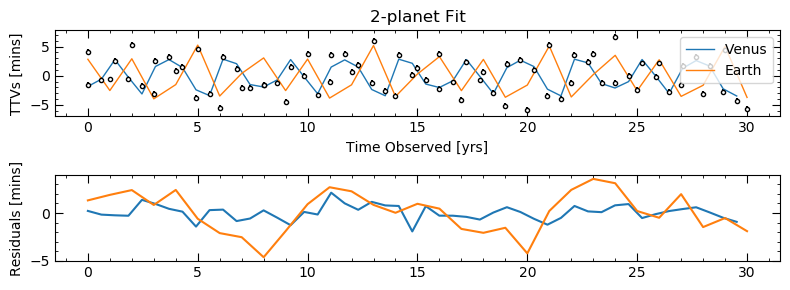

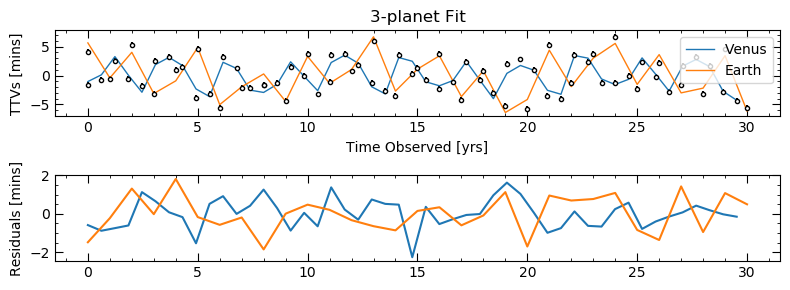

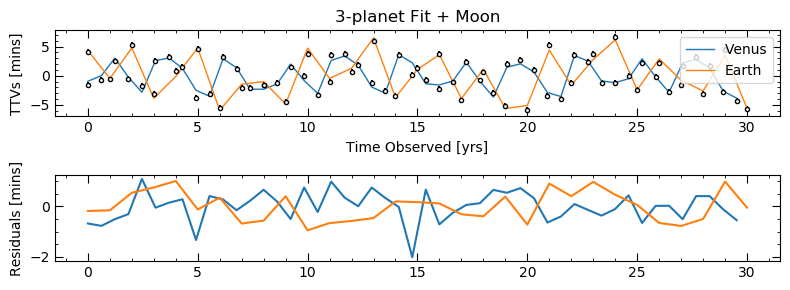

In [79]:
include("plot_ttvs.jl")
plot_res(30.0,30.0,"noEMB","moon",true) 

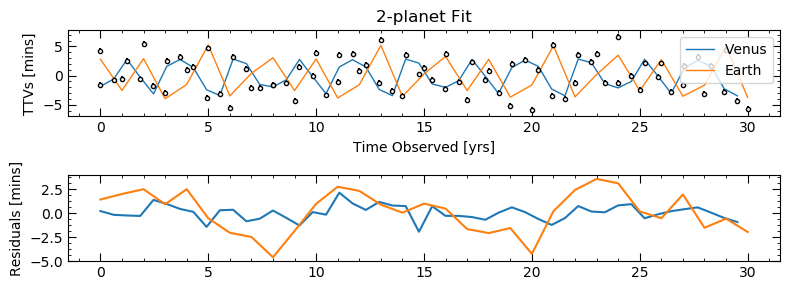

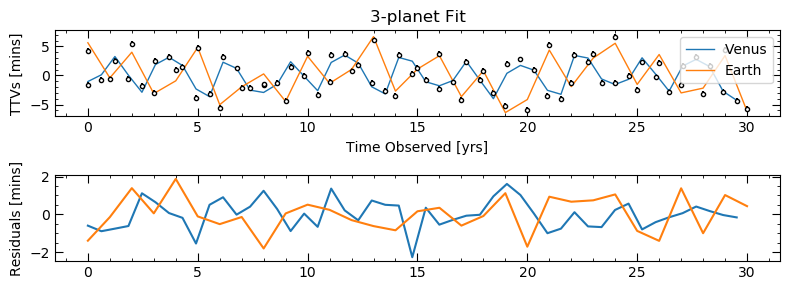

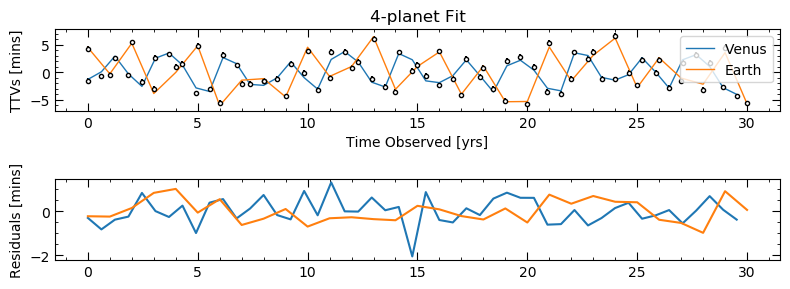

In [243]:
include("plot_ttvs.jl")
plot_res(30.0,30.0,"noEMB","p4",false) 

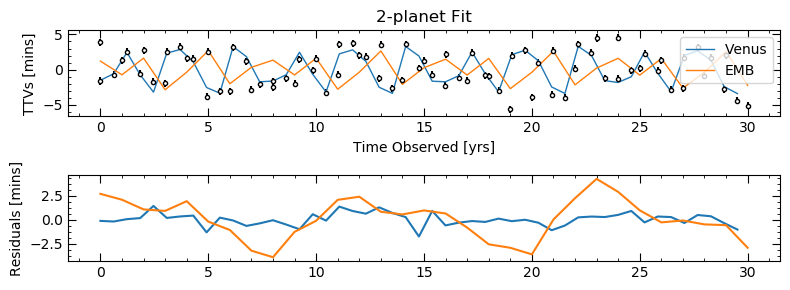

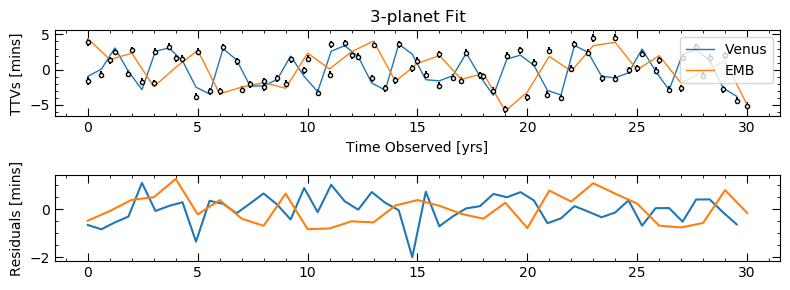

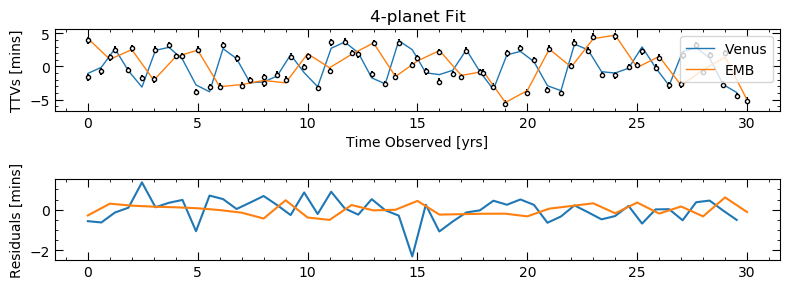

In [138]:
plot_res(30.0,30.0,"EMB","p4",false)  

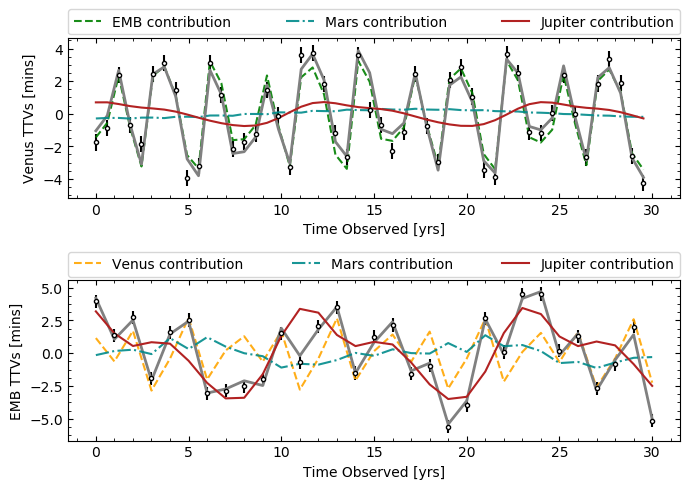

best_p4


In [247]:
plot_ttvs(30.0,30.0,"EMB","p4",false)

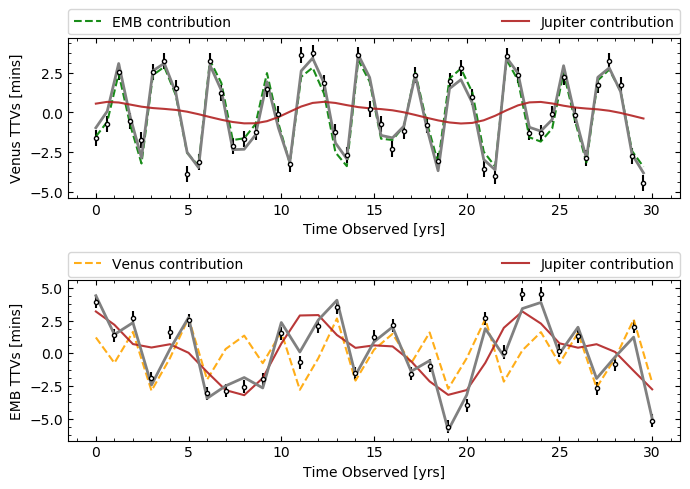

best_p3


In [248]:
plot_ttvs(30.0,30.0,"EMB","p3",false)

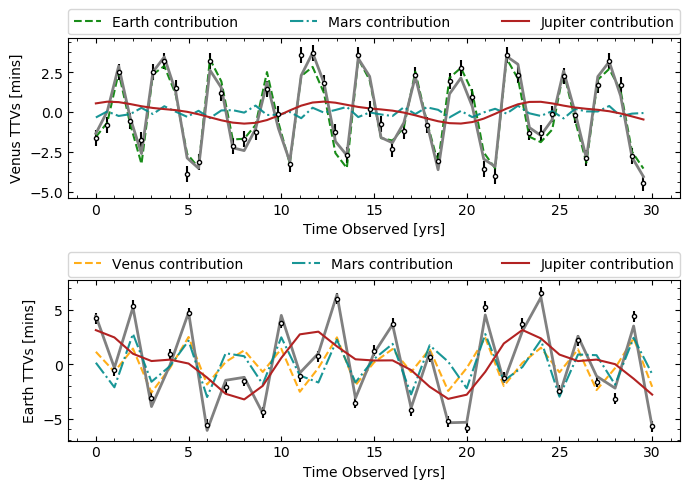

best_p4


In [245]:
include("plot_ttvs.jl")
plot_ttvs(30.0,30.0,"noEMB","p4",false)

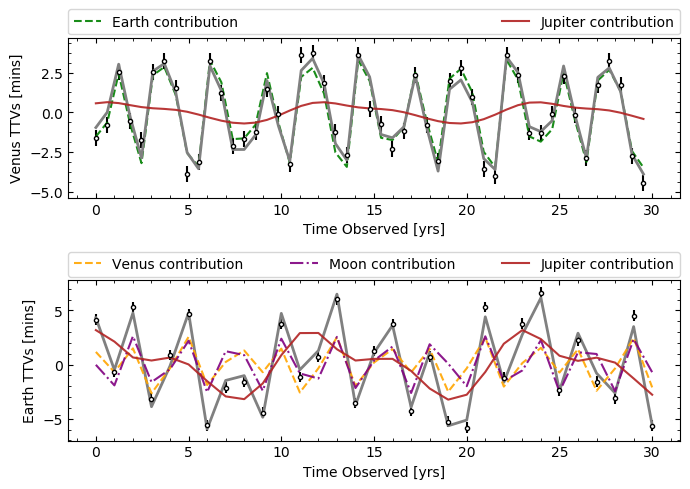

best_dp


In [259]:
plot_ttvs(30.0,30.0,"noEMB","moon",true)

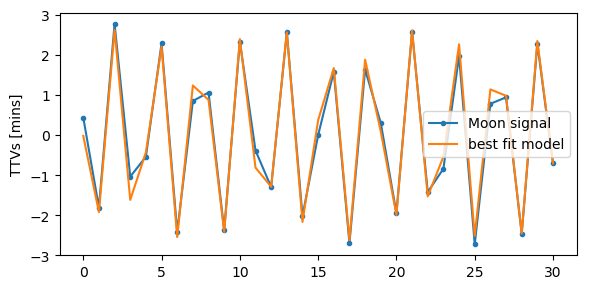

In [258]:
include("plot_ttvs.jl")
plot_moon(30.0,30.0,"p3")

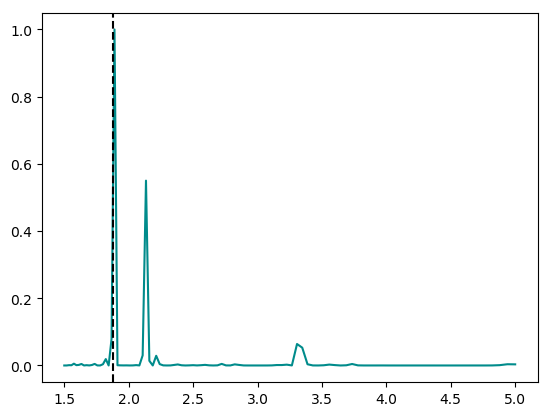

In [98]:
include("plot_likelihood.jl")
plot_likelihood(30.0,30.0,"EMB","p4","p4",50)

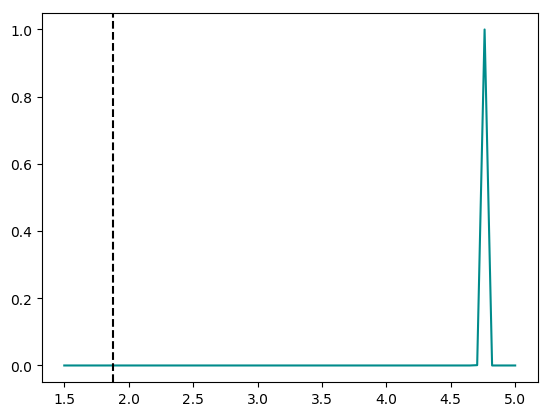

Loading...MCMC/p4_mcmc30.0s30.0yrs.jld2 and FITS/p4_fit30.0s30.0yrs.jld2


In [99]:
plot_likelihood(30.0,30.0,"noEMB","p4","p4",50)

In [260]:
p2 = jldopen("p2mc.jld2","r")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/p2mc.jld2 (read-only)
 ├─🔢 par_mcmc
 ├─🔢 lprob_mcmc
 ├─🔢 param
 ├─🔢 nwalkers
 ├─🔢 nsteps
 ├─🔢 accept
 ├─🔢 iburn
 └─🔢 indepsamples

In [263]:
par_mcmc,lprob_mcmc = p2["par_mcmc"],p2["lprob_mcmc"]
iburn,samples = p2["iburn"], p2["indepsamples"]
nwalkers,nsteps = p2["nwalkers"],p2["nsteps"]
param = p2["param"]
pname = ["mu_1","P_1","t01","ecos1","esin1",
      "mu_2","P_2","t02","ecos2","esin2",
      "mu_3","P_3","t03","ecos3","esin3", 
        "tcosϕ","tsinϕ","Δϕ","σ_sys"]
# open(output,"w") do io
for i=1:length(param)
println(pname[i]," : ",mean(vec(par_mcmc[:,iburn:nsteps,i]))," ± ",std(vec(par_mcmc[:,iburn:nsteps,i]))) # writedlm(results,pbest_global)
end
println(pname[end]," : ",mean(vec(par_mcmc[:,iburn:nsteps,end]))," ± ",std(vec(par_mcmc[:,iburn:nsteps,end])))
println("Derived Parameters")
for i=1:length(param)
    if i%5 == 0
        println("M_p : ",mean(vec(par_mcmc[:,iburn:nsteps,i-4])).* CGS.MSUN/CGS.MEARTH," ± ",std(vec(par_mcmc[:,iburn:nsteps,i-4])).* CGS.MSUN/CGS.MEARTH)
    end     
end

mu_1 : 4.15928839022942e-6 ± 6.18624288956681e-7
P_1 : 224.7007782552164 ± 1.1011795602155861e-5
t01 : 2.433503768748378e6 ± 0.0003064855070134959
ecos1 : -0.04524200381676317 ± 0.04719561805271115
esin1 : -0.029054354682061186 ± 0.026065807661185738
mu_2 : 2.811078330926699e-6 ± 3.6966917569485863e-7
P_2 : 365.2564389550426 ± 2.2166325330020126e-5
t02 : 2.4336244077640874e6 ± 0.0003859248199815893
ecos2 : -0.018971095766740182 ± 0.037195887044490575
esin2 : -0.021941708357377968 ± 0.02050288413578409
σ_sys : 1.078103508760054e-6 ± 2.1171634747807726e-7
Derived Parameters
M_p : 1.3847028665085028 ± 0.20595129402961435
M_p : 0.9358591801323574 ± 0.1230696021095742
